In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import time
from math import pi
np.random.seed(0)

In [3]:
data = pd.read_csv("ML dataset/fetal_health_after.csv")

In [4]:
data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   severe_decelerations                                    4965 non-null   float64
 6   prolongued_decelerations                                4965 non-null   float64
 7   abnormal_short_term_variability                         4965 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,4965.0,135.282263,9.896038,106.0,128.951566,134.394576,143.000000,160.000
accelerations,4965.0,0.001552,0.002958,0.0,0.000000,0.000000,0.002000,0.019
fetal_movement,4965.0,0.012083,0.049934,0.0,0.000000,0.000770,0.004000,0.481
uterine_contractions,4965.0,0.003701,0.003093,0.0,0.000825,0.003359,0.006000,0.015
light_decelerations,4965.0,0.002021,0.003177,0.0,0.000000,0.000000,0.003000,0.015
severe_decelerations,4965.0,0.000012,0.000101,0.0,0.000000,0.000000,0.000000,0.001
prolongued_decelerations,4965.0,0.000474,0.000987,0.0,0.000000,0.000000,0.000000,0.005
abnormal_short_term_variability,4965.0,56.460569,16.560289,12.0,46.000000,60.972969,66.865001,87.000
mean_value_of_short_term_variability,4965.0,1.219440,0.990519,0.2,0.400000,0.900000,1.800000,7.000
percentage_of_time_with_abnormal_long_term_variability,4965.0,18.992305,25.599483,0.0,0.000000,4.642198,32.873115,91.000


C:\Users\admin\AppData\Local\Temp\ipykernel_1164\573530971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="fetal_health", palette=colors)


<Axes: xlabel='fetal_health', ylabel='count'>

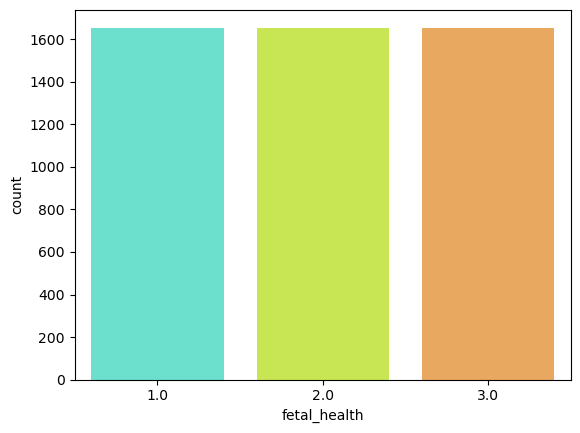

In [7]:
colors = ["#59F3DA", "#D7FF3A", "#FFAA49"]
sns.countplot(data=data, x="fetal_health", palette=colors)

<Axes: >

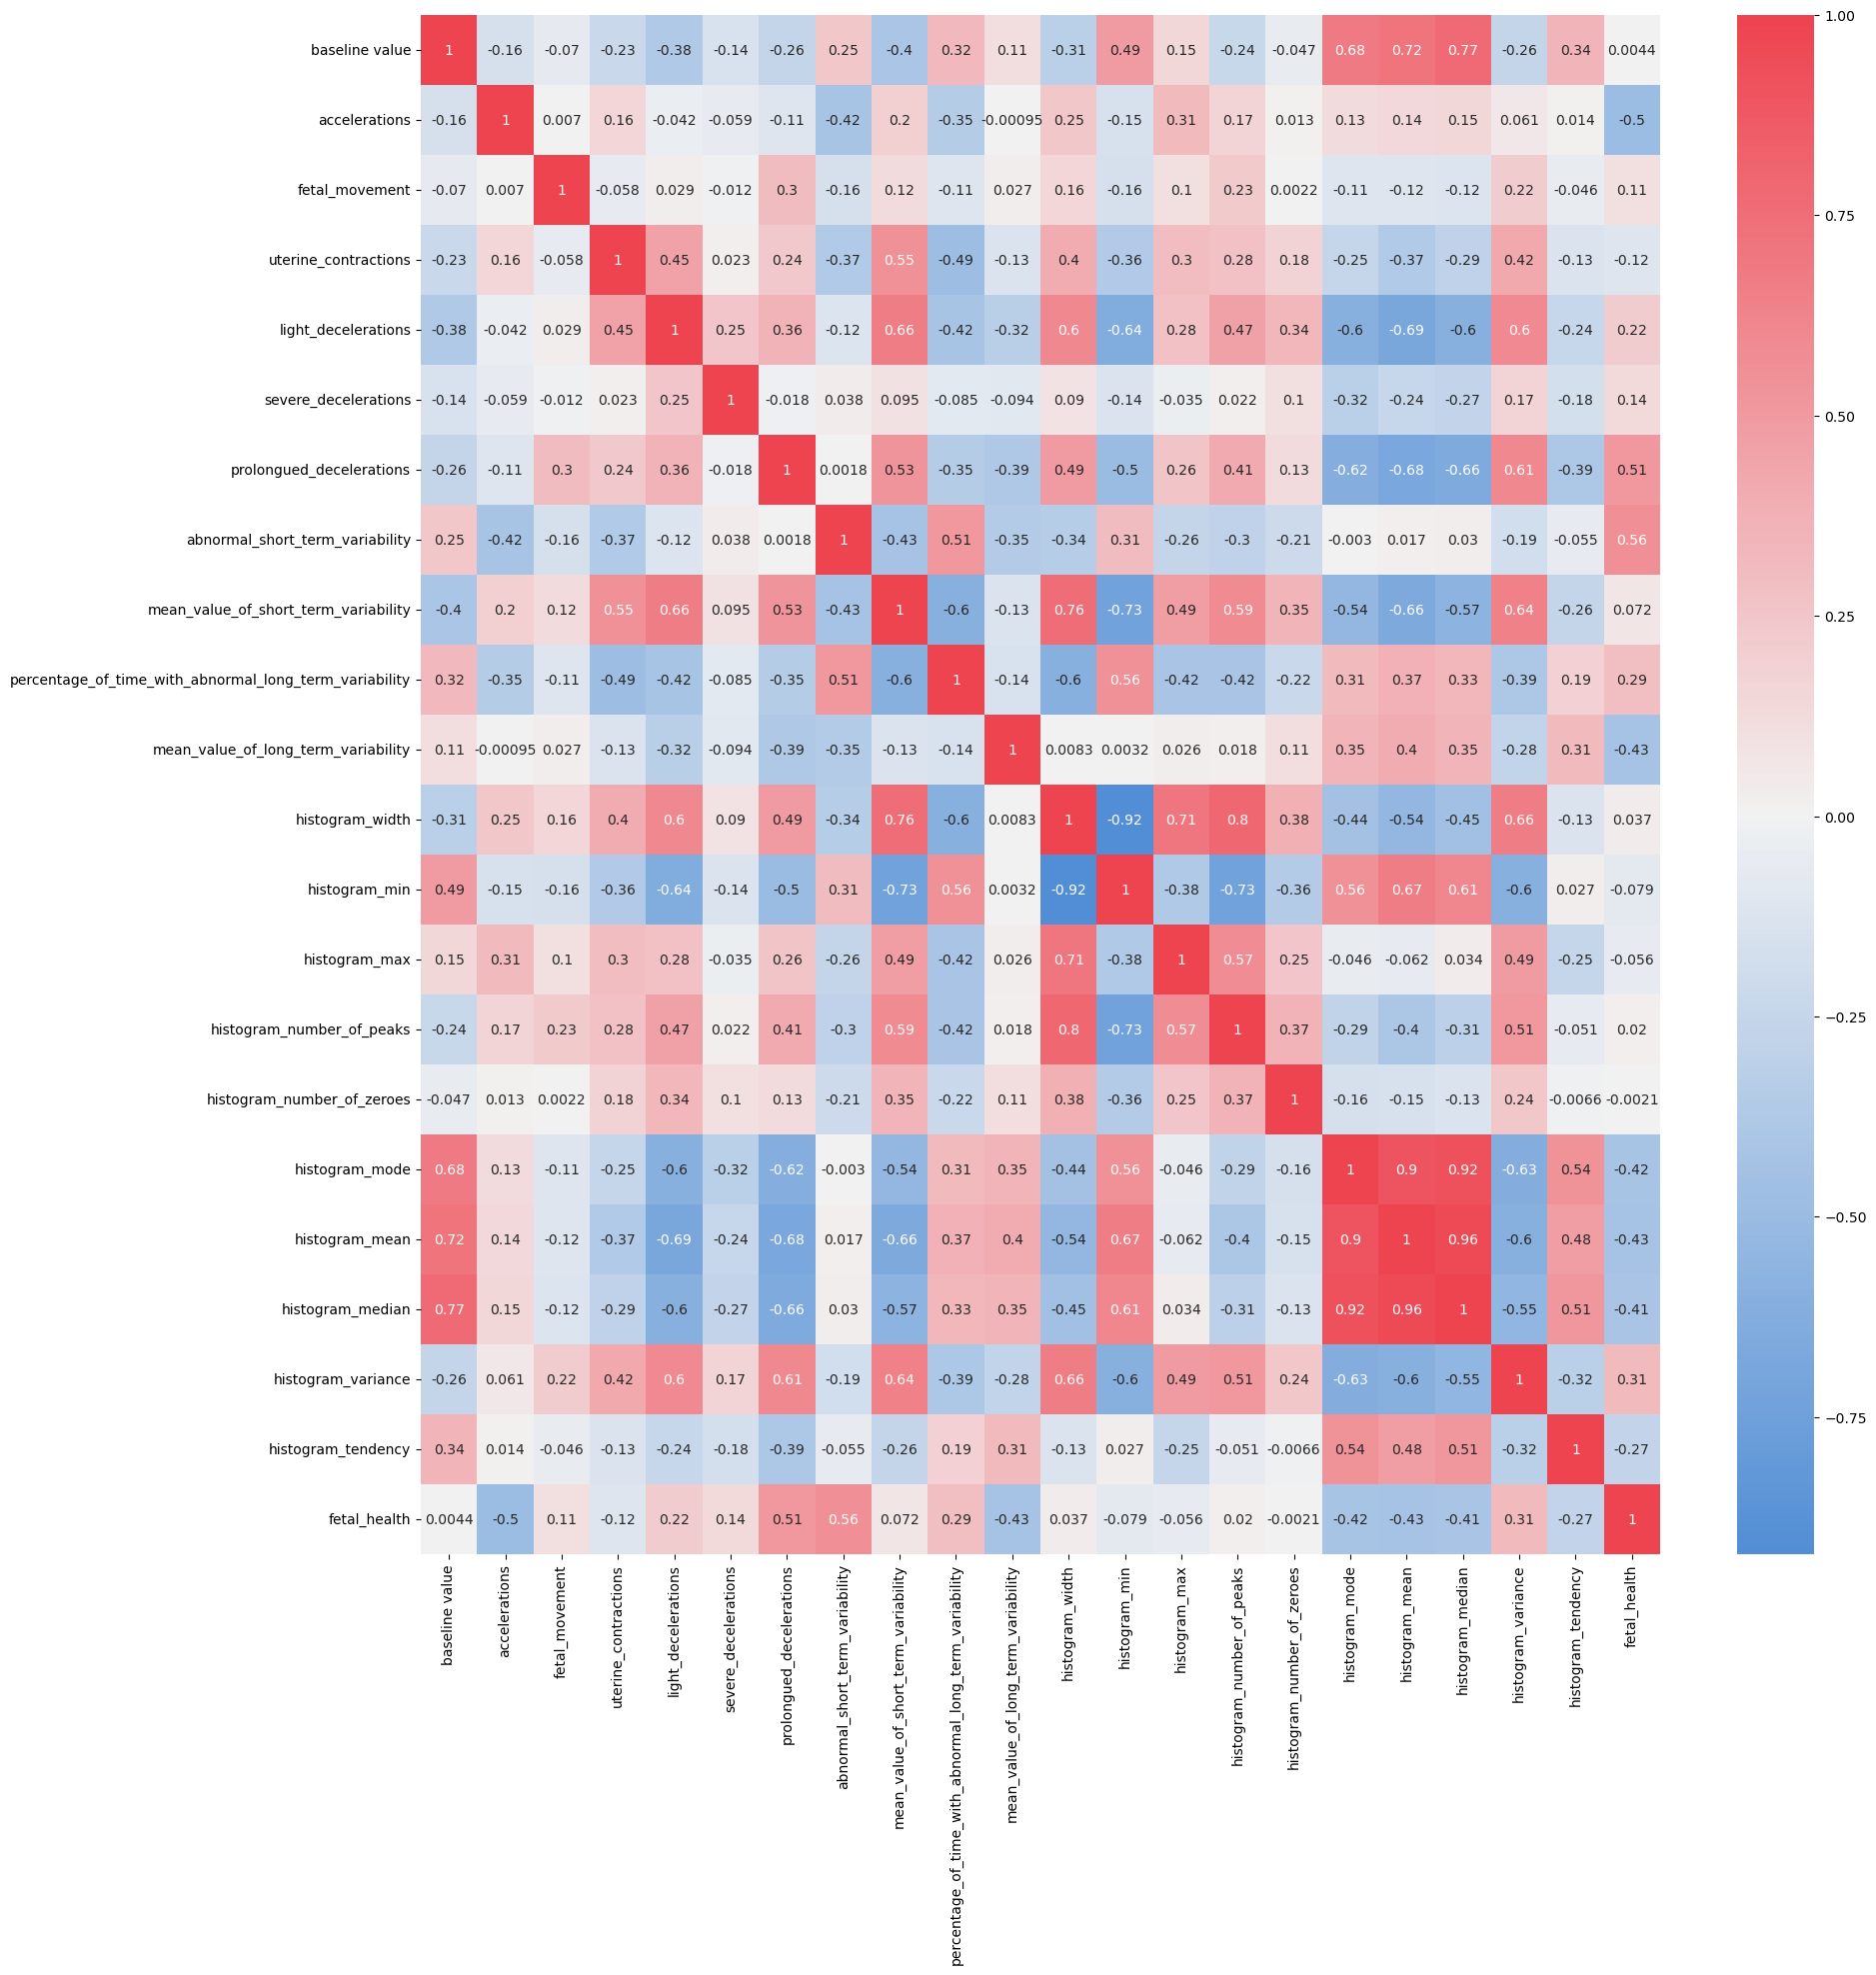

In [8]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [10]:
def filter_by_feature_correlation(df: pd.DataFrame, threshold: float, feature_name: str) -> pd.DataFrame:
    # Kiểm tra feature_name có tồn tại trong dataframe
    if feature_name not in df.columns:
        raise ValueError(f"Feature '{feature_name}' không tồn tại trong DataFrame.")

    correlations = df.corr()[feature_name].abs()

    keep_features = correlations[correlations >= threshold].index.tolist()

    return df[keep_features].copy()

In [11]:
new_data = filter_by_feature_correlation(data, 0.1, 'fetal_health')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   accelerations                                           4965 non-null   float64
 1   fetal_movement                                          4965 non-null   float64
 2   uterine_contractions                                    4965 non-null   float64
 3   light_decelerations                                     4965 non-null   float64
 4   severe_decelerations                                    4965 non-null   float64
 5   prolongued_decelerations                                4965 non-null   float64
 6   abnormal_short_term_variability                         4965 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  4965 non-null   float64
 8   mean_value_of_long_term_variability   

**Start to train Random Forrest model**

*   number of estimator: 100
*   random state: 42
*   balanced class weight





In [12]:
X = new_data.drop(columns=['fetal_health'], axis=1)
y = new_data['fetal_health']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
X_train.shape

(3972, 14)

In [14]:
X_test.shape

(993, 14)

In [15]:
y_train.shape

(3972,)

In [16]:
y_test.shape

(993,)

In [17]:
pipeline=Pipeline([('rf_classifier',RandomForestClassifier(
                                          n_estimators=100,
                                          random_state=42,
                                          class_weight='balanced',
                                          n_jobs=-1
                                      ))
                      ])


# Train the pipeline
pipeline.fit(X_train, y_train)

# Make prediction
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n Detailed Classification Report:")
class_names = ['Normal', 'Suspect', 'Pathological']
print(classification_report(y_test, y_pred, target_names=class_names))

# Cross-validation
print("\n Cross-validation scores:")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


 Model Performance:
Accuracy: 0.9809
Precision: 0.9814
Recall: 0.9809
F1-Score: 0.9809

 Detailed Classification Report:


NameError: name 'classification_report' is not defined

In [18]:
def plot_confusion_matrix(y_test, y_pred):
    """Plot confusion matrix"""
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['Normal', 'Suspect', 'Pathological']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [19]:
def hyperparameter_tuning(X_train, y_train):
    """Perform hyperparameter tuning using GridSearchCV"""
    print("\n Performing hyperparameter tuning...")

    # Create base pipeline
    pipeline = Pipeline([
        ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
    ])

    # Define parameter grid
    param_grid = {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [10, 20, None],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__class_weight': ['balanced', None]
    }

    # Perform grid search
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='accuracy',
        n_jobs=-1, verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"\n Best parameters: {grid_search.best_params_}")
    print(f" Best CV score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

In [20]:
def plot_feature_importance(pipeline, feature_names, top_n=15):
    """Plot feature importance"""
    # Get feature importance from the trained Random Forest
    # Handle both regular pipeline and GridSearchCV result
    if hasattr(pipeline, 'best_estimator_'):
        rf_model = pipeline.best_estimator_.named_steps['rf']
    elif hasattr(pipeline, 'named_steps'):
        rf_model = pipeline.named_steps['rf_classifier']
    else:
        # If it's the model directly
        rf_model = pipeline

    importance = rf_model.feature_importances_

    # Create a DataFrame for easier plotting
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(top_n)

    sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
    plt.title(f'Top {top_n} Feature Importance - Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print(f"\n Top {top_n} Most Important Features:")
    for i, (idx, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i:2d}. {row['feature']}: {row['importance']:.4f}")

**Create a confusion matrix to show performance of the classified model, between predicted result and actual value**


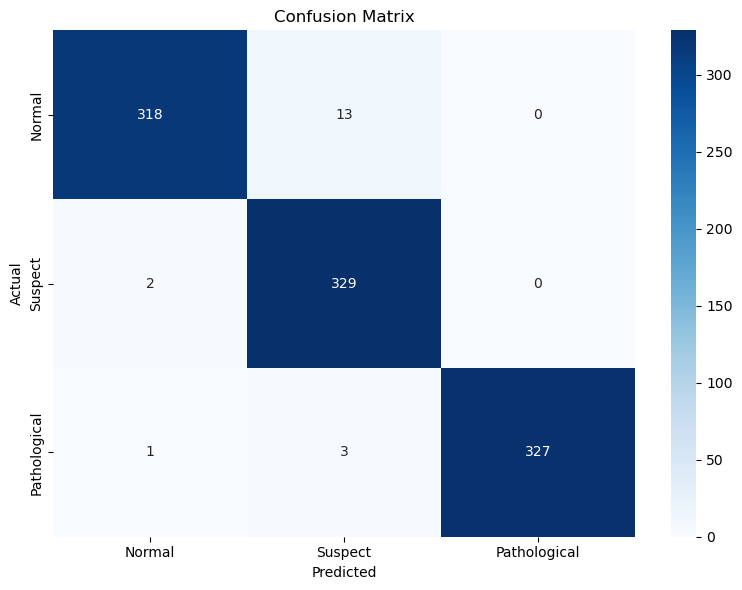

In [21]:
# Plot results
plot_confusion_matrix(y_test, y_pred)


**What plot_feature_importance function does:**

It tells you which **FEATURES (COLUMNS)** in the dataset are most useful for making predictions. It answers the question: "Which measurements matter most for classifying fetal health?

C:\Users\admin\AppData\Local\Temp\ipykernel_1164\2409941458.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


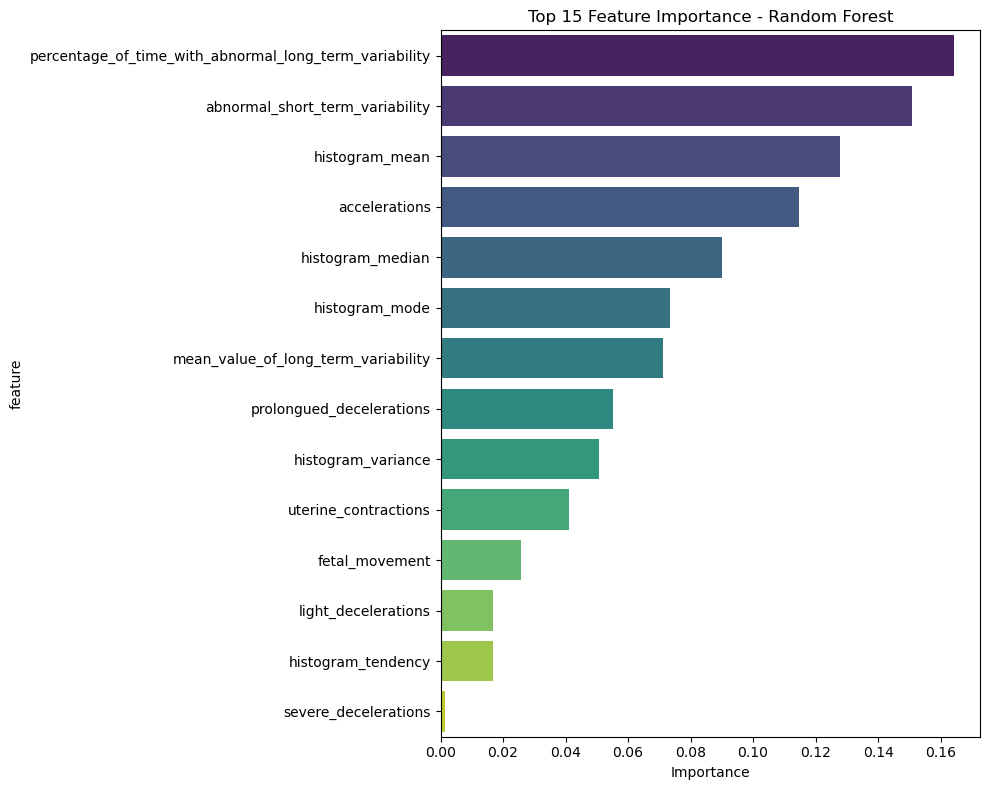


 Top 15 Most Important Features:
 1. percentage_of_time_with_abnormal_long_term_variability: 0.1644
 2. abnormal_short_term_variability: 0.1508
 3. histogram_mean: 0.1279
 4. accelerations: 0.1147
 5. histogram_median: 0.0899
 6. histogram_mode: 0.0734
 7. mean_value_of_long_term_variability: 0.0711
 8. prolongued_decelerations: 0.0552
 9. histogram_variance: 0.0507
10. uterine_contractions: 0.0410
11. fetal_movement: 0.0259
12. light_decelerations: 0.0169
13. histogram_tendency: 0.0168
14. severe_decelerations: 0.0014


In [22]:
plot_feature_importance(pipeline=pipeline, feature_names=X.columns)

**What Hyperparameter_tuning function does:**

param_grid = {

    * 'rf__n_estimators': [100, 200, 300],           # Number of trees in the forest
    * 'rf__max_depth': [10, 20, None],               # Maximum depth of each tree
    * 'rf__min_samples_split': [2, 5, 10],           # Min samples needed to split a node
    * 'rf__min_samples_leaf': [1, 2, 4],             # Min samples required at leaf node
    * 'rf__class_weight': ['balanced', None]         # How to handle class imbalance

}

param_grid define all possible values to test for each hyperparameter (3 x 3 x 3 x 3 x 2 = 162 different combinations).

Using Grid Search to test all combinations in the grid, with Cross-Validation = 5.

What each parameters does:

    Parameters        | What it mean/control             | Impact
    ------------------|----------------------------------|------------
    n_estimators      | Number of decision trees         | More trees = better performance but slower
    ------------------|----------------------------------|------------
    max_depth         | How deep trees can grow          | Deeper = captures complexity but risks overfitting
    ------------------|----------------------------------|------------
    min_samples_split | Min samples to split a node      | Higher = simpler trees, less overfitting
    ------------------|----------------------------------|------------
    min_samples_leaf  | Min samples in leaf nodes        | Higher = smoother predictions
    ------------------|----------------------------------|------------
    class_weight      | Handle imbalanced classes        | 'balanced' helps minority classes

The number of model trainings:

With 162 combinations × 5-fold CV = 810 model trainings. So it may take several a bit of time.

After running the function, it returns the best index model with hyperparameters:
 * class weight = None
 * max depth = 20
 * min sample leaf = 1
 * min sample split = 2
 * number of estimators = 300

In [ ]:
best_pipeline = hyperparameter_tuning(X_train, y_train)


 Performing hyperparameter tuning...
Fitting 5 folds for each of 162 candidates, totalling 810 fits

 Best parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
 Best CV score: 0.9746


## 3. Define Model Pipelines

In [24]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(random_state=42))])

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_svc=Pipeline([('sv_classifier',SVC(probability=True, random_state=42))])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier(random_state=42))])

pipeline_nb = Pipeline([('nb_classifier',GaussianNB())])

# List of all the pipelines
pipelines = [pipeline_rf, pipeline_lr, pipeline_dt, pipeline_svc, pipeline_gbcl, pipeline_nb]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forest', 1: 'Logistic Regression', 2: 'Decision Tree', 3: 'SVM', 4: 'Gradient Boosting', 5: 'Naive Bayes'}


## 4. Train Models and Collect Metrics

In [35]:
# Dictionary to store all results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': [],
    'ROC_AUC': [],
    'Training_Time': [],
    'Prediction_Time': []
}

# Fit the pipelines and collect metrics
for i, pipe in enumerate(pipelines):
    model_name = pipe_dict[i]
    print(f"\n{'='*50}")
    print(f"Training {model_name}...")
    print(f"{'='*50}")

    # Measure training time
    start_time = time.time()
    pipe.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = pipe.predict(X_test)
    prediction_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ROC AUC (handle binary and multiclass)
    try:
        if len(np.unique(y_train)) == 2:
            y_pred_proba = pipe.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = pipe.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = np.nan

    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1_Score'].append(f1)
    results['ROC_AUC'].append(roc_auc)
    results['Training_Time'].append(training_time)
    results['Prediction_Time'].append(prediction_time)

    # Print metrics
    print(f"Accuracy:        {accuracy:.4f}")
    print(f"Precision:        {precision:.4f}")
    print(f"Recall:          {recall:.4f}")
    print(f"F1-Score:        {f1:.4f}")
    print(f"ROC-AUC:         {roc_auc:.4f}")
    print(f"Training Time:   {training_time:.4f}s")
    print(f"Prediction Time: {prediction_time:.4f}s")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)


Training Random Forest...
Accuracy:        0.9809
Precision:        0.9814
Recall:          0.9809
F1-Score:        0.9809
ROC-AUC:         0.9973
Training Time:   0.4784s
Prediction Time: 0.0116s

Training Logistic Regression...
Accuracy:        0.8761
Precision:        0.8820
Recall:          0.8761
F1-Score:        0.8773
ROC-AUC:         0.9660
Training Time:   0.0226s
Prediction Time: 0.0005s

Training Decision Tree...
Accuracy:        0.9557
Precision:        0.9562
Recall:          0.9557
F1-Score:        0.9557
ROC-AUC:         0.9668
Training Time:   0.0306s
Prediction Time: 0.0006s

Training SVM...
Accuracy:        0.9456
Precision:        0.9488
Recall:          0.9456
F1-Score:        0.9458
ROC-AUC:         0.9887
Training Time:   1.1633s
Prediction Time: 0.2298s

Training Gradient Boosting...
Accuracy:        0.9708
Precision:        0.9711
Recall:          0.9708
F1-Score:        0.9708
ROC-AUC:         0.9958
Training Time:   2.6421s
Prediction Time: 0.0047s

Training 

## 5. Visualization 1: Performance Metrics Bar Charts

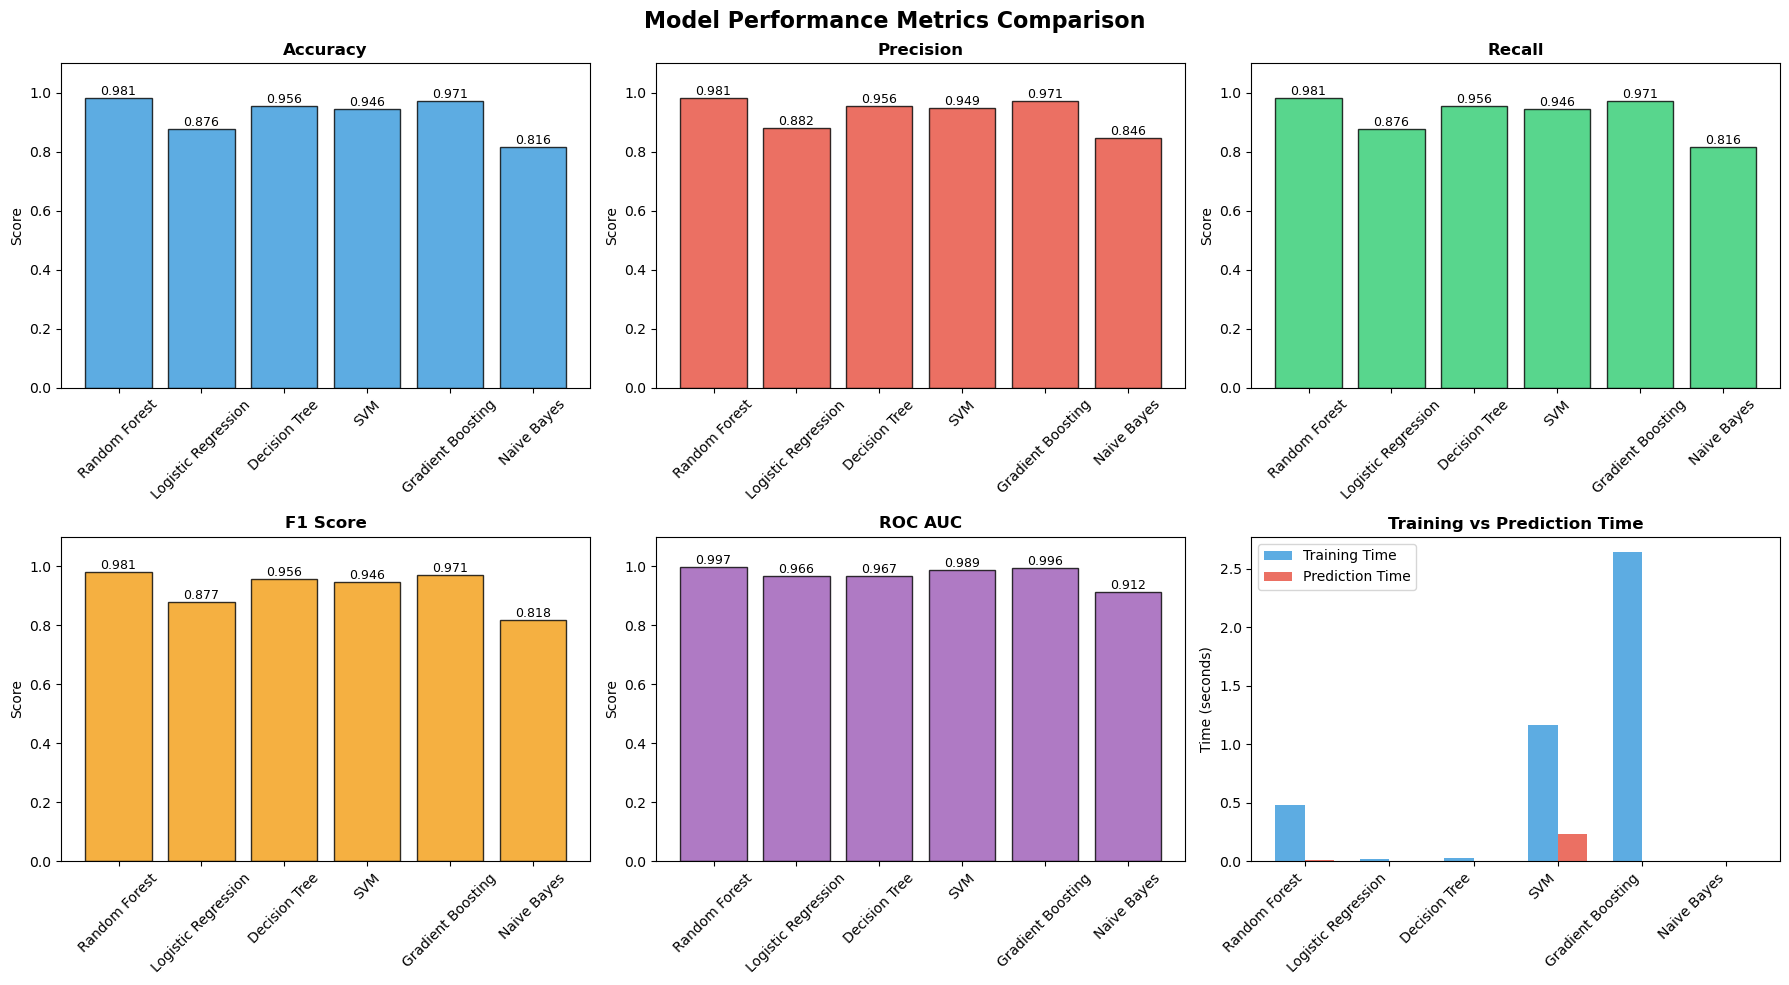

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    bars = ax.bar(results_df['Model'], results_df[metric], color=colors[idx], alpha=0.8, edgecolor='black')
    ax.set_title(f'{metric.replace("_", " ")}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=9)

# Time comparison
ax = axes[1, 2]
x = np.arange(len(results_df['Model']))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Training_Time'], width, label='Training Time', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Prediction_Time'], width, label='Prediction Time', color='#e74c3c', alpha=0.8)

ax.set_title('Training vs Prediction Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Time (seconds)', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## 6. Visualization 2: Radar Chart

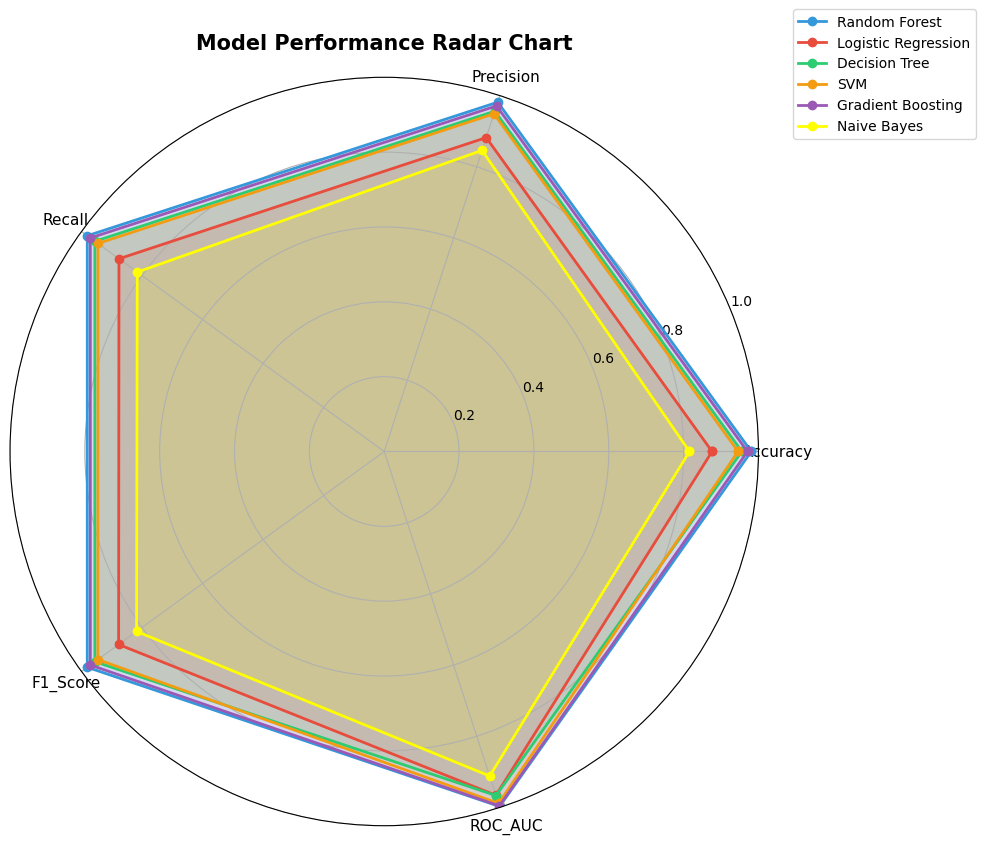

In [38]:
# Select metrics for radar chart
categories = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data for each model
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', "#ffff00"]

for idx, model in enumerate(results_df['Model']):
    values = results_df.loc[idx, categories].values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Radar Chart', size=15, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## 7. Visualization 3: Cross-Validation Box Plot

C:\Users\admin\AppData\Local\Temp\ipykernel_1164\2882454285.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(cv_results, labels=model_names, patch_artist=True,


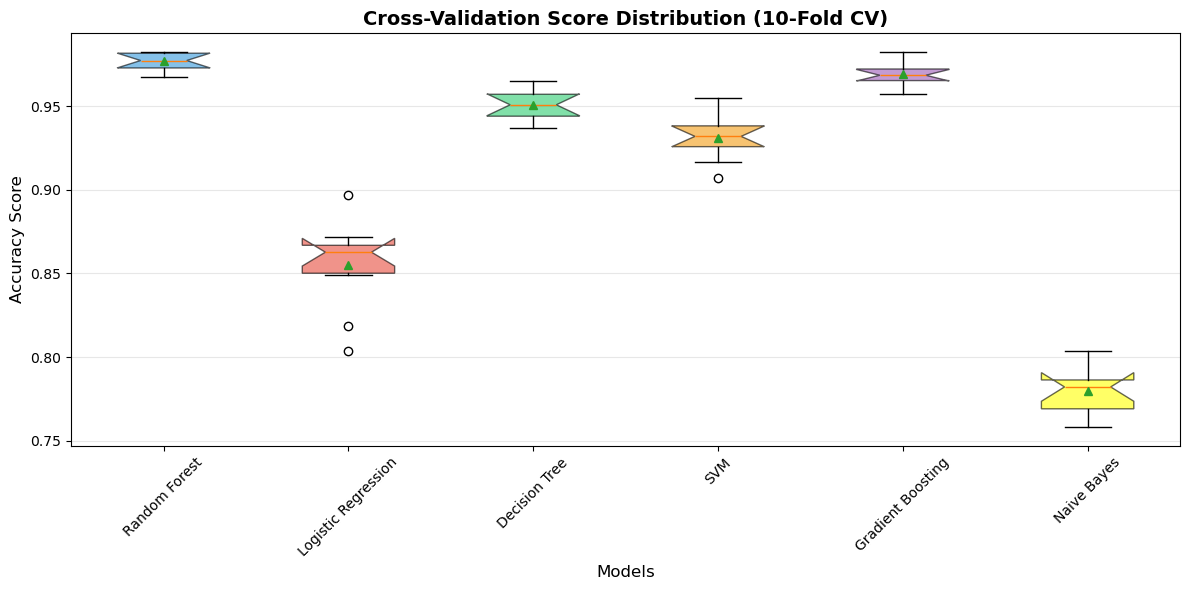

In [39]:
cv_results = []
model_names = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_results.append(cv_score)
    model_names.append(pipe_dict[i])

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(cv_results, labels=model_names, patch_artist=True,
                 notch=True, showmeans=True)

# Color the boxes
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', "#ffff00"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_title('Cross-Validation Score Distribution (10-Fold CV)', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Visualization 4: Confusion Matrices

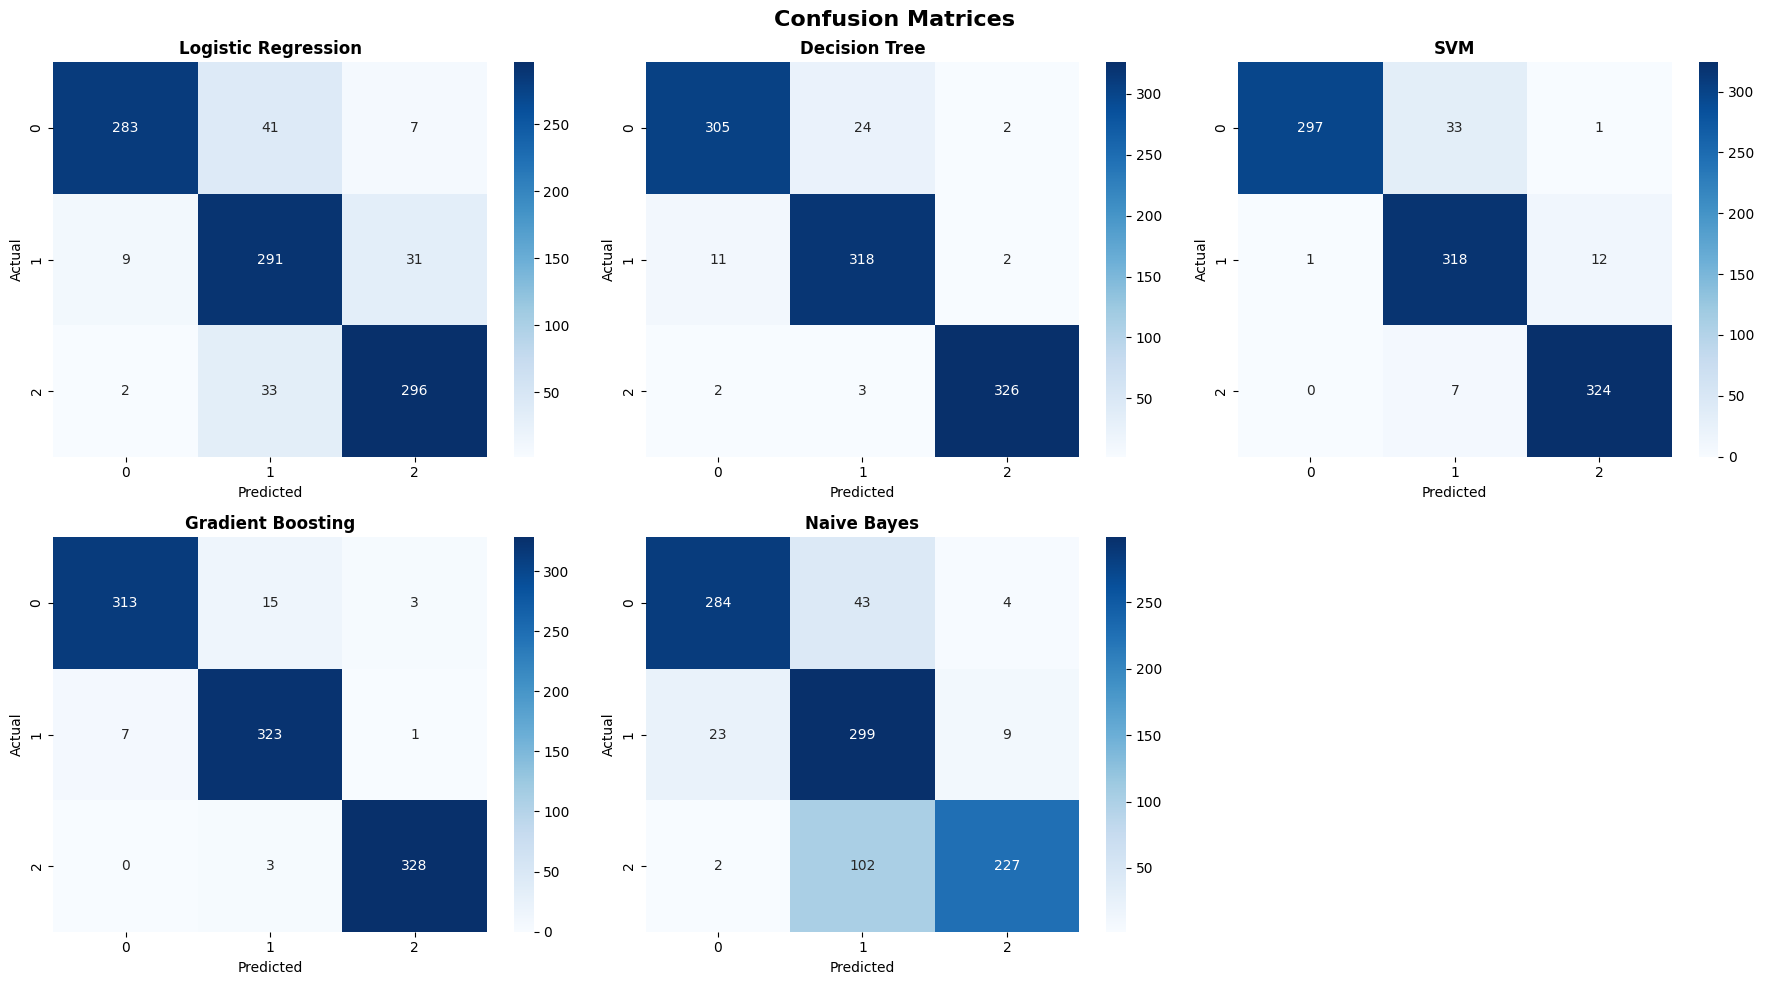

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for i, pipe in enumerate(pipelines):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
    ax.set_title(pipe_dict[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=10)
    ax.set_xlabel('Predicted', fontsize=10)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 9. Visualization 5: ROC Curves
This cell handles both binary and multiclass classification

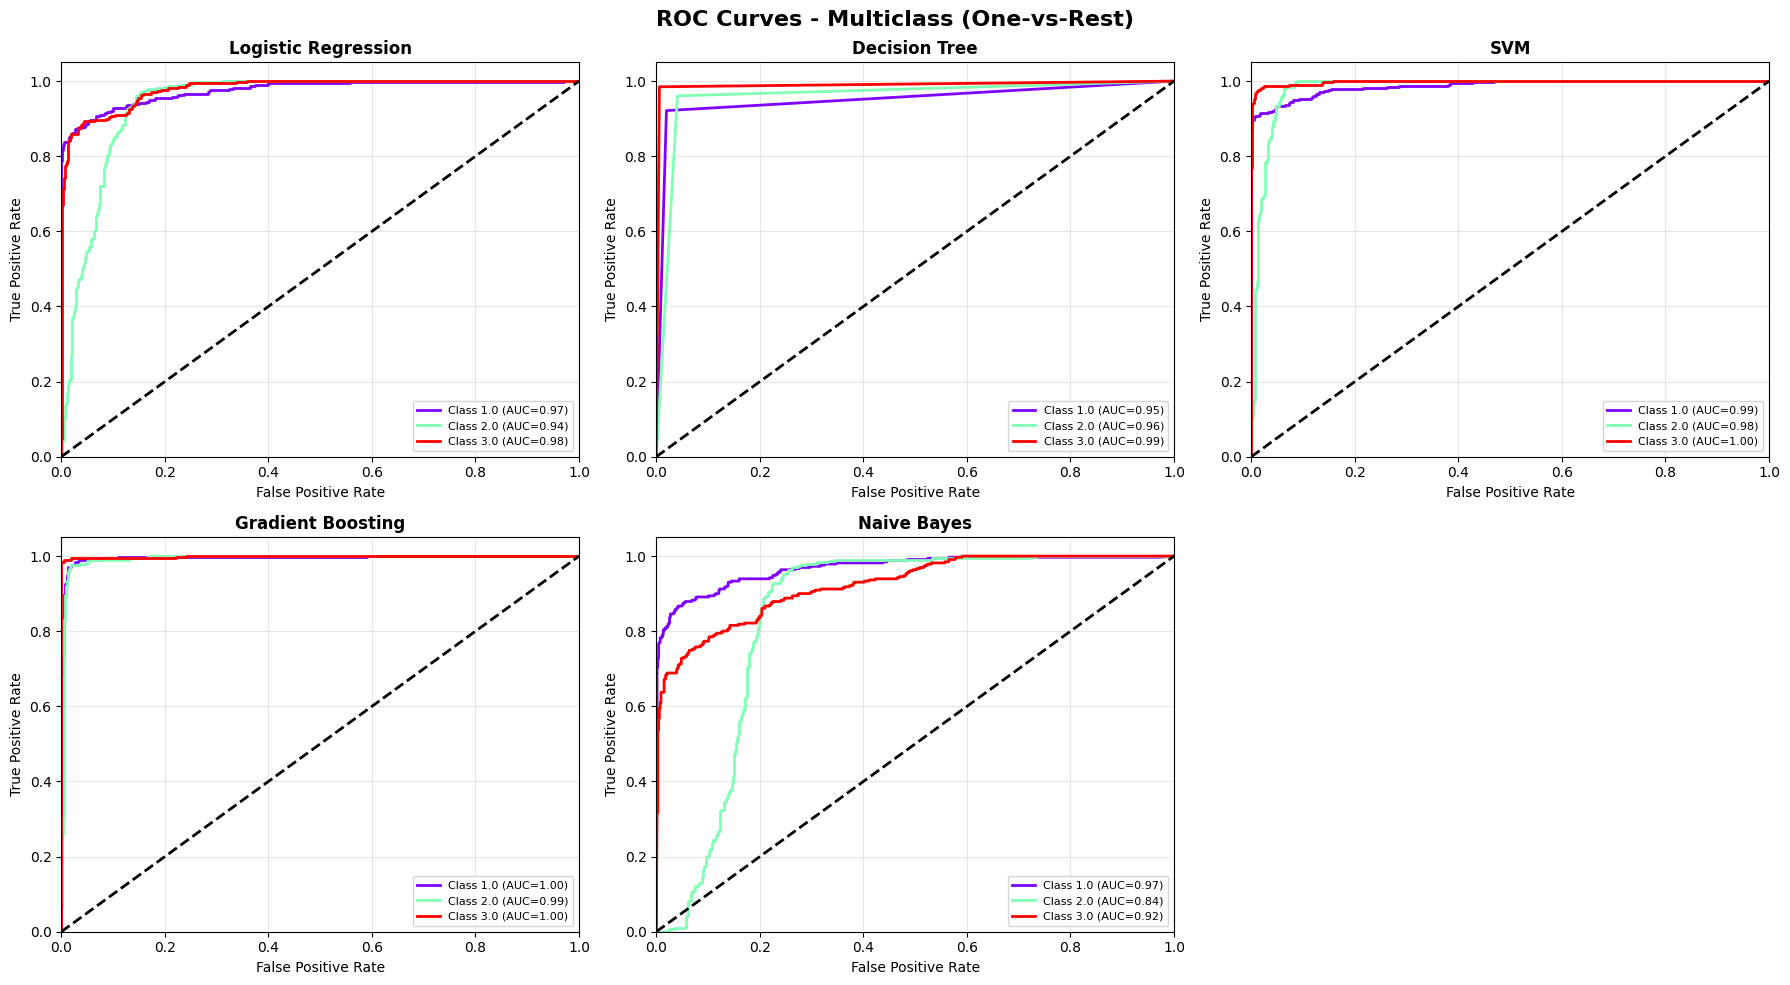

In [ ]:
# Check if binary or multiclass
if len(np.unique(y_train)) == 2:
    # Binary classification ROC
    plt.figure(figsize=(10, 8))
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

    for i, pipe in enumerate(pipelines):
        try:
            y_pred_proba = pipe.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, color=colors[i], lw=2,
                    label=f'{pipe_dict[i]} (AUC = {roc_auc:.3f})')
        except:
            print(f"Could not plot ROC curve for {pipe_dict[i]}")
            continue

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    # Multiclass ROC
    classes = np.unique(y_test)
    n_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('ROC Curves - Multiclass (One-vs-Rest)', fontsize=16, fontweight='bold')

    colors_classes = plt.cm.rainbow(np.linspace(0, 1, n_classes))

    for i, pipe in enumerate(pipelines):
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        try:
            y_pred_proba = pipe.predict_proba(X_test)

            for class_idx in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_pred_proba[:, class_idx])
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, lw=2, color=colors_classes[class_idx],
                       label=f'Class {classes[class_idx]} (AUC={roc_auc:.2f})')

            ax.plot([0, 1], [0, 1], 'k--', lw=2)
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(pipe_dict[i], fontweight='bold')
            ax.legend(loc="lower right", fontsize=8)
            ax.grid(alpha=0.3)
        except:
            ax.text(0.5, 0.5, f'ROC not available\nfor {pipe_dict[i]}',
                   ha='center', va='center', fontsize=12)
            ax.set_xlim([0, 1])
            ax.set_ylim([0, 1])

    axes[1, 2].axis('off')
    plt.tight_layout()
    plt.show()

## 10. Summary Table Display

In [ ]:
# Display styled DataFrame
display_df = results_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']:
    display_df[col] = display_df[col].apply(lambda x: f'{x:.4f}' if not np.isnan(x) else 'N/A')
for col in ['Training_Time', 'Prediction_Time']:
    display_df[col] = display_df[col].apply(lambda x: f'{x:.4f}s')

display_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-weight', 'bold')])]
)

,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Training_Time,Prediction_Time
0,Logistic Regression,0.8761,0.8820,0.8761,0.8773,0.9660,0.0864s,0.0029s
1,Decision Tree,0.9557,0.9562,0.9557,0.9557,0.9668,0.0722s,0.0008s
2,SVM,0.9456,0.9488,0.9456,0.9458,0.9887,1.1434s,0.0810s
3,Gradient Boosting,0.9708,0.9711,0.9708,0.9708,0.9958,3.4123s,0.0058s
4,Naive Bayes,0.8157,0.8461,0.8157,0.8181,0.9119,0.0023s,0.0007s


## 11. Export All Charts to Files

Run this cell to save all visualizations as high-resolution PNG files (300 DPI) for your report

In [41]:
import os

# Create output directory
output_dir = 'charts'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}/")

print(f"Saving all visualizations to '{output_dir}/' directory...\n")

# 1. Save metrics comparison
print("[1/6] Saving metrics comparison...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', "#ffff00"]

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    bars = ax.bar(results_df['Model'], results_df[metric], color=colors[idx], alpha=0.8, edgecolor='black')
    ax.set_title(f'{metric.replace("_", " ")}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=45)

    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}',
                   ha='center', va='bottom', fontsize=9)

ax = axes[1, 2]
x = np.arange(len(results_df['Model']))
width = 0.35
bars1 = ax.bar(x - width/2, results_df['Training_Time'], width, label='Training Time', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Prediction_Time'], width, label='Prediction Time', color='#e74c3c', alpha=0.8)
ax.set_title('Training vs Prediction Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Time (seconds)', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig(f'{output_dir}/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Save radar chart
print("[2/6] Saving radar chart...")
categories = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for idx, model in enumerate(results_df['Model']):
    values = results_df.loc[idx, categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Radar Chart', size=15, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.savefig(f'{output_dir}/radar_chart.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Save CV boxplot
print("[3/6] Saving cross-validation boxplot...")
cv_results_save = []
model_names_save = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_results_save.append(cv_score)
    model_names_save.append(pipe_dict[i])

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(cv_results_save, labels=model_names_save, patch_artist=True, notch=True, showmeans=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_title('Cross-Validation Score Distribution (10-Fold CV)', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{output_dir}/cv_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Save confusion matrices
print("[4/6] Saving confusion matrices...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

for i, pipe in enumerate(pipelines):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
    ax.set_title(pipe_dict[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=10)
    ax.set_xlabel('Predicted', fontsize=10)

axes[1, 2].axis('off')
plt.tight_layout()
plt.savefig(f'{output_dir}/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. Save ROC curves
print("[5/6] Saving ROC curves...")
if len(np.unique(y_train)) == 2:
    # Binary
    plt.figure(figsize=(10, 8))

    for i, pipe in enumerate(pipelines):
        try:
            y_pred_proba = pipe.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc_val = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{pipe_dict[i]} (AUC = {roc_auc_val:.3f})')
        except:
            continue

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.close()
else:
    # Multiclass
    classes = np.unique(y_test)
    n_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('ROC Curves - Multiclass (One-vs-Rest)', fontsize=16, fontweight='bold')
    colors_classes = plt.cm.rainbow(np.linspace(0, 1, n_classes))

    for i, pipe in enumerate(pipelines):
        row = i // 3
        col = i % 3
        ax = axes[row, col]

        try:
            y_pred_proba = pipe.predict_proba(X_test)
            for class_idx in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_pred_proba[:, class_idx])
                roc_auc_val = auc(fpr, tpr)
                ax.plot(fpr, tpr, lw=2, color=colors_classes[class_idx],
                       label=f'Class {classes[class_idx]} (AUC={roc_auc_val:.2f})')

            ax.plot([0, 1], [0, 1], 'k--', lw=2)
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(pipe_dict[i], fontweight='bold')
            ax.legend(loc="lower right", fontsize=8)
            ax.grid(alpha=0.3)
        except:
            ax.text(0.5, 0.5, f'ROC not available\nfor {pipe_dict[i]}', ha='center', va='center', fontsize=12)

    axes[1, 2].axis('off')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.close()

# 6. Save summary table
print("[6/6] Saving summary table...")
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

display_df_save = results_df.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']:
    display_df_save[col] = display_df_save[col].apply(lambda x: f'{x:.4f}' if not np.isnan(x) else 'N/A')
for col in ['Training_Time', 'Prediction_Time']:
    display_df_save[col] = display_df_save[col].apply(lambda x: f'{x:.4f}s')

table = ax.table(cellText=display_df_save.values, colLabels=display_df_save.columns,
                cellLoc='center', loc='center', colColours=['#3498db']*len(display_df_save.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

for i in range(len(display_df_save.columns)):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(display_df_save) + 1):
    for j in range(len(display_df_save.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#ecf0f1')
        else:
            table[(i, j)].set_facecolor('#ffffff')

plt.title('Model Comparison Summary Table', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/summary_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Save results to CSV
results_df.to_csv(f'{output_dir}/model_comparison_results.csv', index=False)

print(f"\n✅ All visualizations saved successfully!")
print(f"\nSaved files in '{output_dir}/':")
print("  📊 metrics_comparison.png")
print("  📊 radar_chart.png")
print("  📊 cv_boxplot.png")
print("  📊 confusion_matrices.png")
print("  📊 roc_curves.png")
print("  📊 summary_table.png")
print("  📄 model_comparison_results.csv")
print(f"\nAll images are saved at 300 DPI, ready for publication/reports!")

Saving all visualizations to 'charts/' directory...

[1/6] Saving metrics comparison...
[2/6] Saving radar chart...
[3/6] Saving cross-validation boxplot...


C:\Users\admin\AppData\Local\Temp\ipykernel_1164\3881642963.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(cv_results_save, labels=model_names_save, patch_artist=True, notch=True, showmeans=True)


[4/6] Saving confusion matrices...
[5/6] Saving ROC curves...
[6/6] Saving summary table...

✅ All visualizations saved successfully!

Saved files in 'charts/':
  📊 metrics_comparison.png
  📊 radar_chart.png
  📊 cv_boxplot.png
  📊 confusion_matrices.png
  📊 roc_curves.png
  📊 summary_table.png
  📄 model_comparison_results.csv

All images are saved at 300 DPI, ready for publication/reports!
